Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [16]:
query1 = pd.read_csv('/Users/yakovlev/Downloads/query_1.csv')
query1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [17]:
query1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Как можно видеть, имеем данные о различных моделях самолетах, а также о полетах

Изобразим график, на котором показано сколько полетов совершил тот или иной самолет (модель самолета)

In [30]:
query1.sort_values(by='flights_amount', inplace=True)

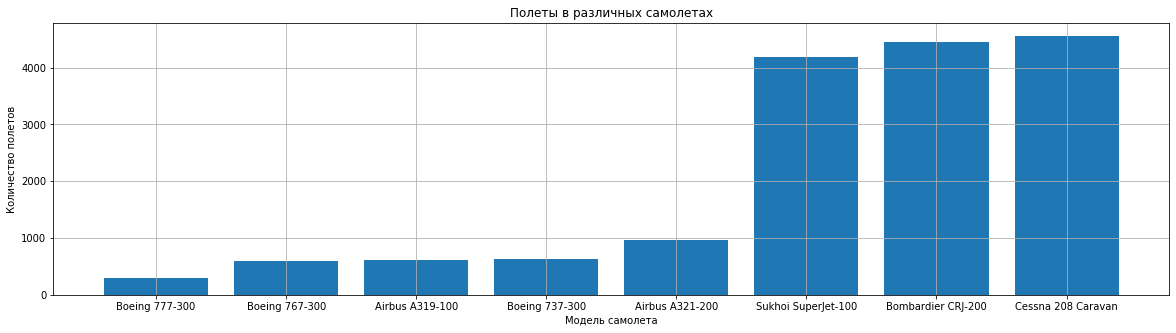

In [31]:
plt.figure(figsize=(20,5))
plt.bar(query1['model'], query1['flights_amount'])
plt.grid()
plt.title("Полеты в различных самолетах")
plt.xlabel('Модель самолета')
plt.ylabel('Количество полетов')
plt.show()

Те модели самолетов, в которых больше вместимость летают меньше

Изучим второй запрос

In [19]:
query2 = pd.read_csv('/Users/yakovlev/Downloads/query_3.csv')
query2.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [20]:
query2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


С типами переменных все в порядке.

Изобразим график "Полеты в города России"

In [21]:
query2.sort_values(by='average_flights', inplace=True)

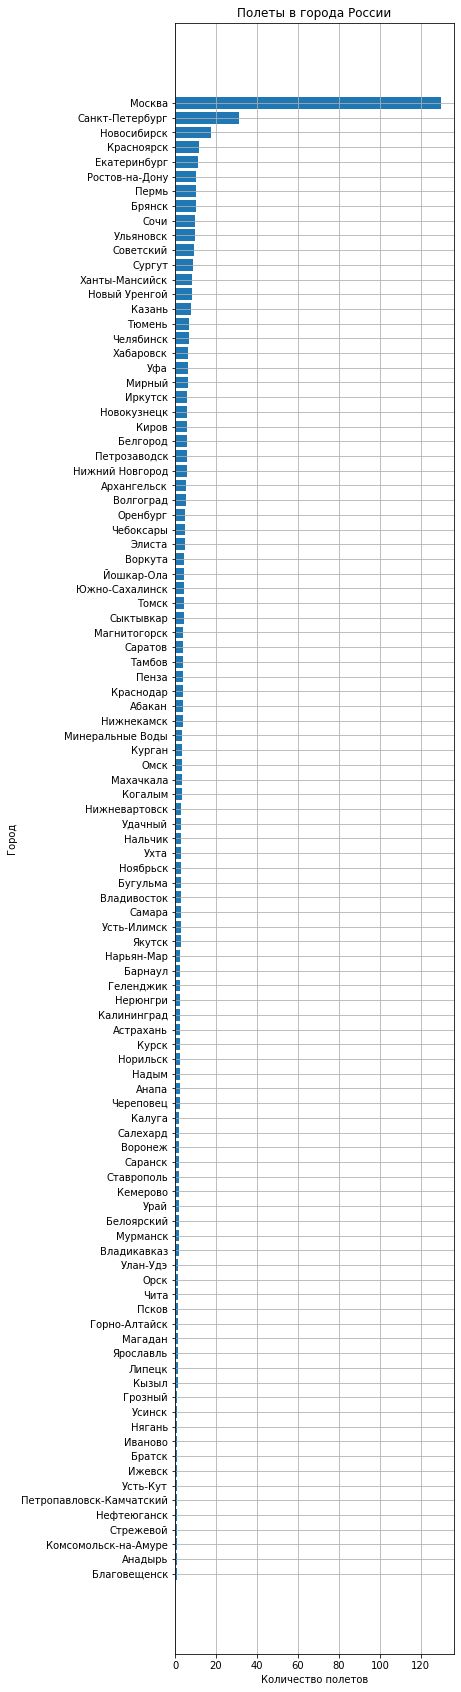

In [22]:
plt.figure(figsize=(5,30))
plt.barh(query2['city'], query2['average_flights'])
plt.grid()
plt.xlabel('Количество полетов')
plt.ylabel('Город')
plt.title('Полеты в города России')
plt.show()

График сложночитаемый, уменьшим выборку для 10 городов, в которые летают чаще всего

In [23]:
query2 = query2.nlargest(10, 'average_flights').reset_index(drop=True)
query2

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


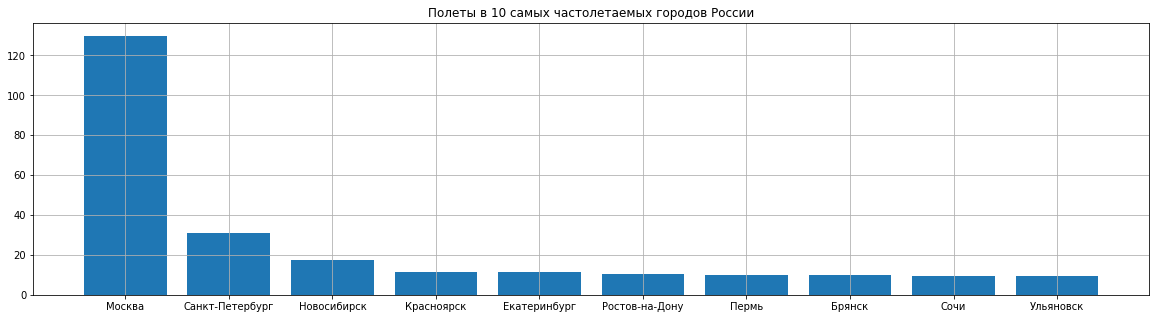

In [24]:
plt.figure(figsize=(20,5))
plt.bar(query2['city'], query2['average_flights'])
plt.grid()
plt.title('Полеты в 10 самых частолетаемых городов России')
plt.show()

## Вывод

Самые частолетаемые самолеты - те, где меньше посадочных мест, что достаточно логично

Чаще всего летают в Москву и Санкт-Петербург. Хочется отметить, что в Москву летает столько самолетов, сколько во все остальные города России из топ-10 вместе взятые

# 2. Проверка гипотезы

Загрузим последний запрос

In [25]:
query3 = pd.read_csv('/Users/yakovlev/Downloads/query_last.csv')
query3

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Столбец "festival_week" не нужна для анализа, т.к она полностью дублирует колонку "week_number" за исключением пропущенных значений.

Избавимся от данного столбца, а в "festival_name" пропущенные значения заменим на "Нет концерта"

In [26]:
query3['festival_name'].fillna('Нет концерта', inplace=True)
query3 = query3.drop('festival_week', axis=1)
query3

,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
2,32,51675,Нет концерта
3,33,51378,Нет концерта
4,34,51492,Нет концерта
5,35,51360,Нет концерта
6,36,51386,Видфест
7,37,51670,Нет концерта
8,38,51518,Нет концерта
9,39,51623,Нет концерта


Изобразим график, иллюстрирующий сколько билетов было продано в разные недели

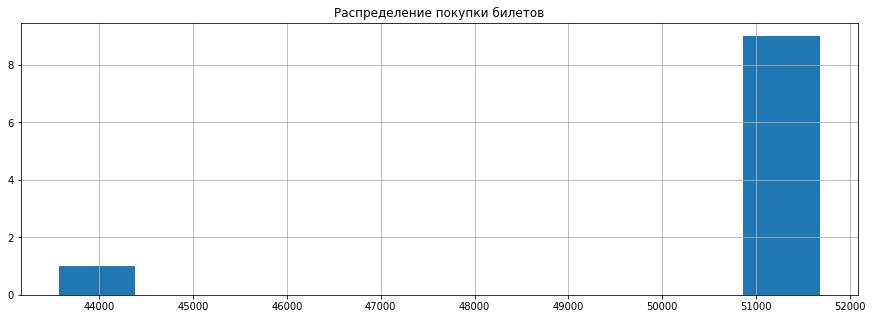

In [27]:
plt.figure(figsize=(15,5))
plt.hist(query3['ticket_amount'])
plt.grid()
plt.title('Распределение покупки билетов')
plt.show()

Как можем заметить, распределение отлично от нормального, данные являются независимыми, следовательно, для проверки гиппотезы, воспользуемся критерием Манна-уитни

Выделим недели с фестивалями и без них

In [28]:
fest_weeks = query3.iloc[[2,3,4,5,7,8,9]]
other_weeks = query3.iloc[[0,1,6]]
display(fest_weeks)
display(other_weeks)

,week_number,ticket_amount,festival_name
2,32,51675,Нет концерта
3,33,51378,Нет концерта
4,34,51492,Нет концерта
5,35,51360,Нет концерта
7,37,51670,Нет концерта
8,38,51518,Нет концерта
9,39,51623,Нет концерта


,week_number,ticket_amount,festival_name
0,30,43568,Park Live
1,31,51034,Пикник Афиши
6,36,51386,Видфест


Гипотеза h0: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время", тогда гипотеза h1 выглядит следующим образом "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время"

Установим уровень статистической значимости на 3% (p-value = 0.03)

In [29]:
p_value = mannwhitneyu(fest_weeks['ticket_amount'], other_weeks['ticket_amount']).pvalue
print('Значение p', p_value)
if p_value > 0.03:
    print('Гипотезу h0 опровергнуть не удалось')
else:
    print('Гипотеза h0 опровергнута')

Значение p 0.03412374418900064
Гипотезу h0 опровергнуть не удалось


## Вывод

Как можем видеть, гипотеза была опровергнута, но если бы мы установили p-value на 0.05 (типичное значение), то получили бы другой результат. Для более четкого доказательства нам нужно больше данных.

Но а пока, глядя на те же графики, сложно увидеть какие-то изменения из-за проведения фестивалей.

Гипотеза **«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»** - не была опровергнута

# Общий вывод

В результате выяснили,  что охотнее всего летают в Москву, причем фестивали здесь ни при чем. Самая частая модель самолетов - Cessna 208 - самолет, с 14 посадочными местами

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод